In [ ]:
#Murat Durmuş

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('survey_results_public.csv')
print('file:', 'survey_results_public.csv')
print('file_details:', df.shape)
print('columns:', list(df.columns))

file: survey_results_public.csv
file_details: (65437, 114)
Columns (first 20): ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfess

In [5]:
df = df.dropna(axis=1, how='all') # drop empty columns

# delete not important / invisable spaces
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

# turn numerics to numbers
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = pd.to_numeric(df[c].str.replace(',', ''), errors='ignore')
df.head(5)

C:\Users\murat.durmus\AppData\Local\Temp\ipykernel_29344\3410429631.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c].str.replace(',', ''), errors='ignore')


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,Employed full-time,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN
1,2,I am a developer by profession,35-44 years old,Employed full-time,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree (B.A. B.S. B.Eng. etc.),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,NaN,NaN
2,3,I am a developer by profession,45-54 years old,Employed full-time,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master’s degree (M.A. M.S. M.Eng. MBA etc.),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,Student full-time,nan,Apples,nan,Some college/university study without earning ...,Other online resources (e.g. videos blogs foru...,Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,Student full-time,nan,Apples,nan,Secondary school (e.g. American high school Ge...,Other online resources (e.g. videos blogs foru...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [72]:
df_age = df.groupby('Age').size().reset_index(name='count')
df_age

,Age,count
0,18-24 years old,3428
1,25-34 years old,10348
2,35-44 years old,6220
3,45-54 years old,2321
4,55-64 years old,861
5,65 years or older,137
6,Prefer not to say,9
7,Under 18 years old,64


In [10]:
# lets pick a target_column. "ConvertedCompYearly" should be target column because the salary should not be in different currencies, they should be in one currency which is USD.

target_column = "ConvertedCompYearly"

# Keep only reasonable target values
y = pd.to_numeric(df[target_column], errors='coerce')

# only sensible salaries
mask = y.notna() & (y > 0) & (y < 1_000_000)

# keep valid rows
df = df.loc[mask].copy()
y = y.loc[mask]

# drop target column: "ConvertedCompYearly"
X = df.drop(columns=[target_column])

# how many rows used?
print('rows_used:', len(y))

rows_used: 23388


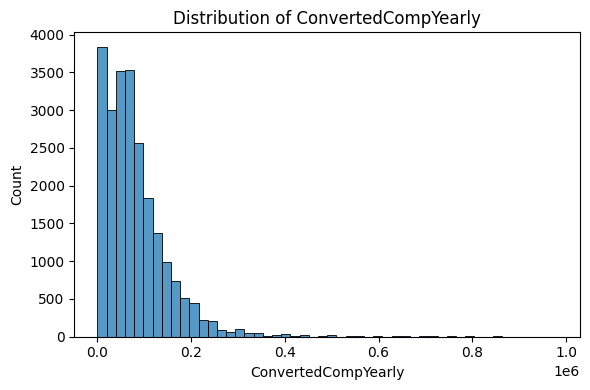

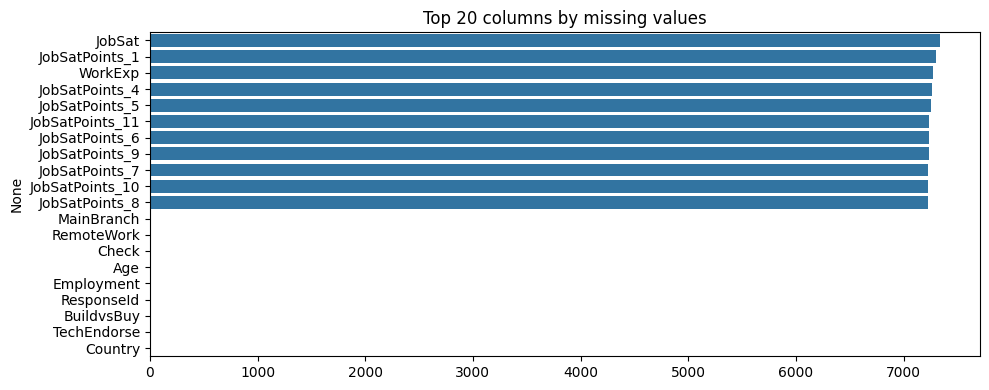

In [11]:
# Quick Exploratory Data Analysis
import re, os
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50)
plt.title(f'Distribution of {target_column}')
plt.tight_layout()
os.makedirs('../images', exist_ok=True)
plt.savefig('../images/target_hist.png', dpi=150)
plt.show()

na_counts = X.isna().sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,4))
sns.barplot(x=na_counts.values, y=na_counts.index)
plt.title('Top 20 columns by missing values')
plt.tight_layout()
plt.savefig('../images/missing_top20.png', dpi=150)
plt.show()

Text(0.5, 1.0, 'Log Distribution of ConvertedCompYearly')

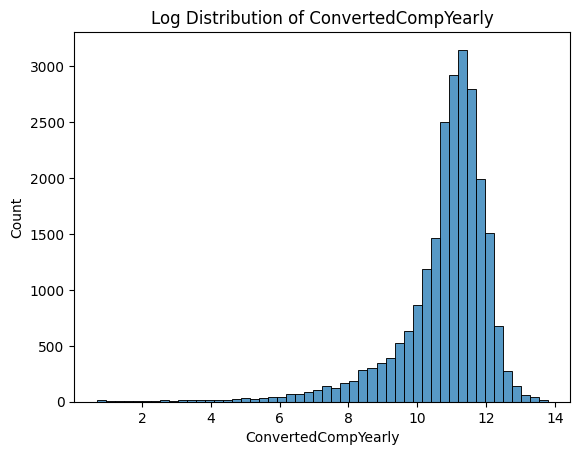

In [12]:

sns.histplot(np.log1p(y), bins=50)
plt.title(f'Log Distribution of {target_column}')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
y = pd.to_numeric(df[target_column], errors="coerce")
X = df.drop(columns=[target_column])

# --- 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Build preprocessing for ALL columns ---
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_pipe = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown="ignore"))])
preprocess = ColumnTransformer([ ("num", numeric_pipe, num_cols), ("cat", categorical_pipe, cat_cols)])

# Model (Random Forest)
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

#intead of manual, clean one clean line
pipe = Pipeline([("prep", preprocess), ("model", model)])

#Fit on training set
pipe.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"r^2: {r2:.3f}")
print(f"MAE: {mae:,.2f}")

r^2: 0.943
MAE: 3,567.14


r^2: 0.943
MAE: 3,567.14

R² = 94.3% means that model explains 94.3% of the variation
RandomForest is capturing patterns very effectively

Mean Absolute Error of: $3,567 per year means that model's predictions are off on avarage by only 3.5k

In [16]:
# lets try another model (linear regression)
from sklearn.linear_model import LinearRegression

lin = Pipeline([("prep", preprocess), ("model", LinearRegression())])

lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)

print("Linear Regression")
print(f"r^2: {r2_score(y_test, y_pred_lin):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):,.2f}")

Linear Regression
r^2: 0.008
MAE: 52,000.81


C:\Users\murat.durmus\AppData\Local\Temp\ipykernel_29344\58546123.py:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\murat.durmus\AppData\Local\Temp\ipykernel_29344\58546123.py:15: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig('../images/feature_importances_top20.png', dpi=150)
C:\Users\murat.durmus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


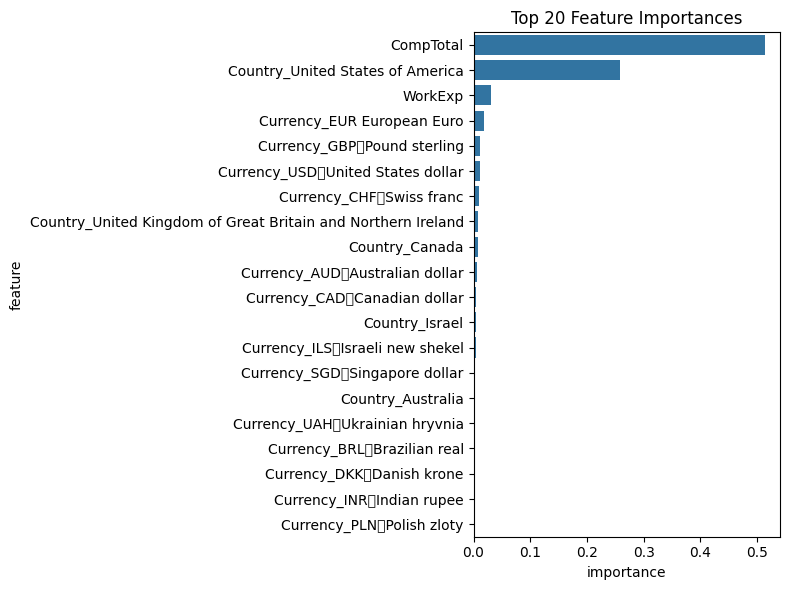

In [17]:
# Feature importances (top20)
prep = pipe.named_steps['prep']
ohe = prep.named_transformers_['cat'].named_steps['ohe'] if 'cat' in prep.named_transformers_ else None
num_names = num_cols
cat_names = list(ohe.get_feature_names_out(cat_cols)) if ohe is not None else []
all_names = num_names + cat_names
importances = pipe.named_steps['model'].feature_importances_

imp_df = pd.DataFrame({'feature': all_names, 'importance': importances})          .sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x='importance', y='feature')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('../images/feature_importances_top20.png', dpi=150)
plt.show()

In [ ]:
# CompTotal is so high. lets check the leakage

tmp = pd.concat(
    [pd.to_numeric(df["CompTotal"], errors="coerce"),
     pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")],
    axis=1, keys=["CompTotal", "ConvertedCompYearly"]
).dropna()

tmp.corr(method="pearson") 


,CompTotal,ConvertedCompYearly
CompTotal,1.000000,0.080211
ConvertedCompYearly,0.080211,1.000000


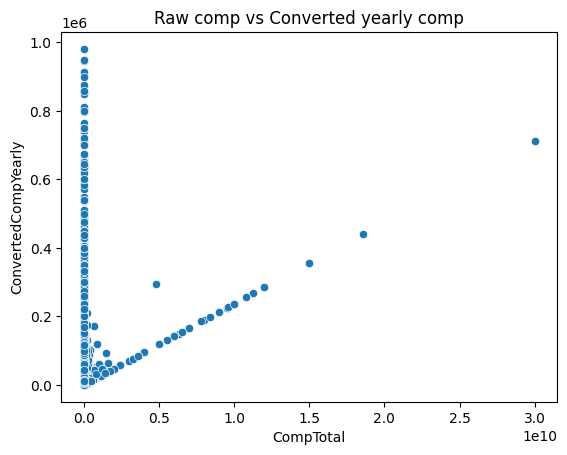

In [19]:
sns.scatterplot(data=tmp, x="CompTotal", y="ConvertedCompYearly")
plt.title("Raw comp vs Converted yearly comp")
plt.show()

In [20]:
# define a pattern of columns to exclude from X
leaky_patterns = ("comp", "salary")

leaky_cols = [c for c in X.columns if any(p in c.lower() for p in leaky_patterns)]
leaky_cols
#  ['CompTotal']  (+ anything else that matches)

X_noleak = X.drop(columns=leaky_cols, errors="ignore")


In [22]:
df[['CompTotal','ConvertedCompYearly','Currency']].head(10)
df[['CompTotal','ConvertedCompYearly']].dtypes

CompTotal              float64
ConvertedCompYearly    float64
dtype: object

In [ ]:
# drop leaky columns
leaky_tokens = ['CompTotal', 'salary', 'pay', 'income'] 
leaky_cols = [c for c in X.columns if any(tok in c.lower() for tok in leaky_tokens)]

print(f"dropping leaked columns ({len(leaky_cols)}): {leaky_cols}")
X_noleak = X.drop(columns=leaky_cols, errors='ignore')

# column lists on the new feature set
num_cols = X_noleak.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X_noleak.columns if c not in num_cols]

# rebuild the preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

numeric_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),])
categorical_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore')),])

preprocess = ColumnTransformer([('num', numeric_pipe, num_cols), ('cat', categorical_pipe, cat_cols),])

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
pipe = Pipeline([('prep', preprocess), ('model', model),])

# Split + fit + evaluate
X_train, X_test, y_train, y_test = train_test_split( X_noleak, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(f"new r^2: {r2_score(y_test, y_pred):.3f}")
print(f"new MAE: {mean_absolute_error(y_test, y_pred):,.2f}")

dropping leaked columns (2): ['CompTotal', 'AIComplex']
new r^2: 0.473
new MAE: 28,987.23
